In [78]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=False)

print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (250000,)
X has shape (250000, 30)


# Data Set Analysis

## Spy Nan Values
White is NAN, black is finite value

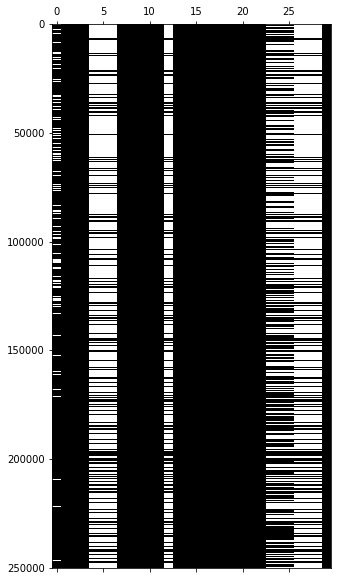

In [92]:
NAN_values_overview_matrix(tx, y)

## Feature Engineering

### Spy basic Feature
In this anaylsis, we aim to diplay the feature distributions. The NAN values will be ignored.

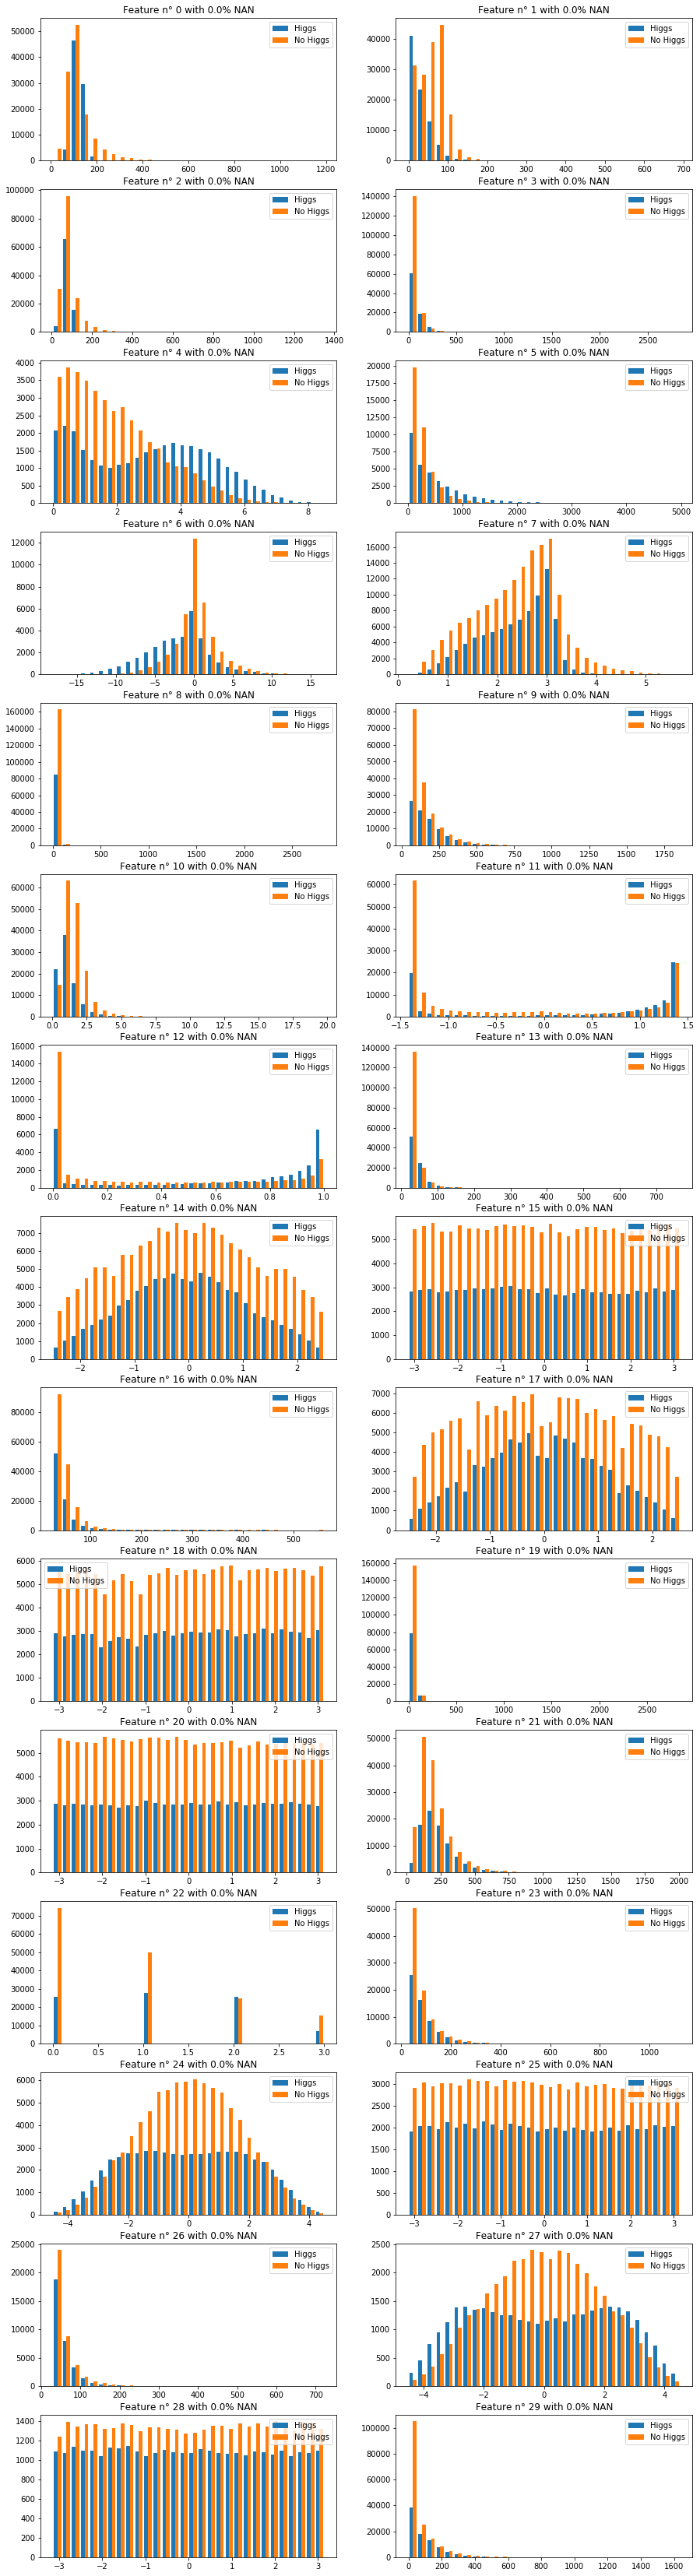

In [93]:
display_feature_distribution(y, tx, 30)

### NAN values processing

Transform Unknow values to NAN

In [94]:
tx_nan = transform_to_nan(tx, -900)

Add bool columns for NAN patterns

In [95]:
nan_columns_patterns = [0, 4, 23]
tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

Put NAN values to mean

In [96]:
tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

### Transform to log scale

We apply square transformation to column 6 so it will have exp distribution.
Columns number [0, 2, 3, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29] seems to have exp distribution. Therefore, we will apply log.

In [97]:
features_square = [6]
tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

In [98]:
features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
tx_log = transform_feature_log(tx_square, features_log)

### Decompose angles
Features [11, 12, 14, 15, 17] are angles in [rad]. It is a good idea to decompose angles in cos/sin/tan/arccos/arcsin/arctan. Here np.sin() is good for feature 11 and 12, for the rest, we should find another function

In [99]:
features_sin = [11, 12, 14, 15, 17]
tx_angle_stand = standardize_angles(tx_log, features_sin)
tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

### Combine Columns

### Standardize features
We standardize only the functions that have contineous spectrum

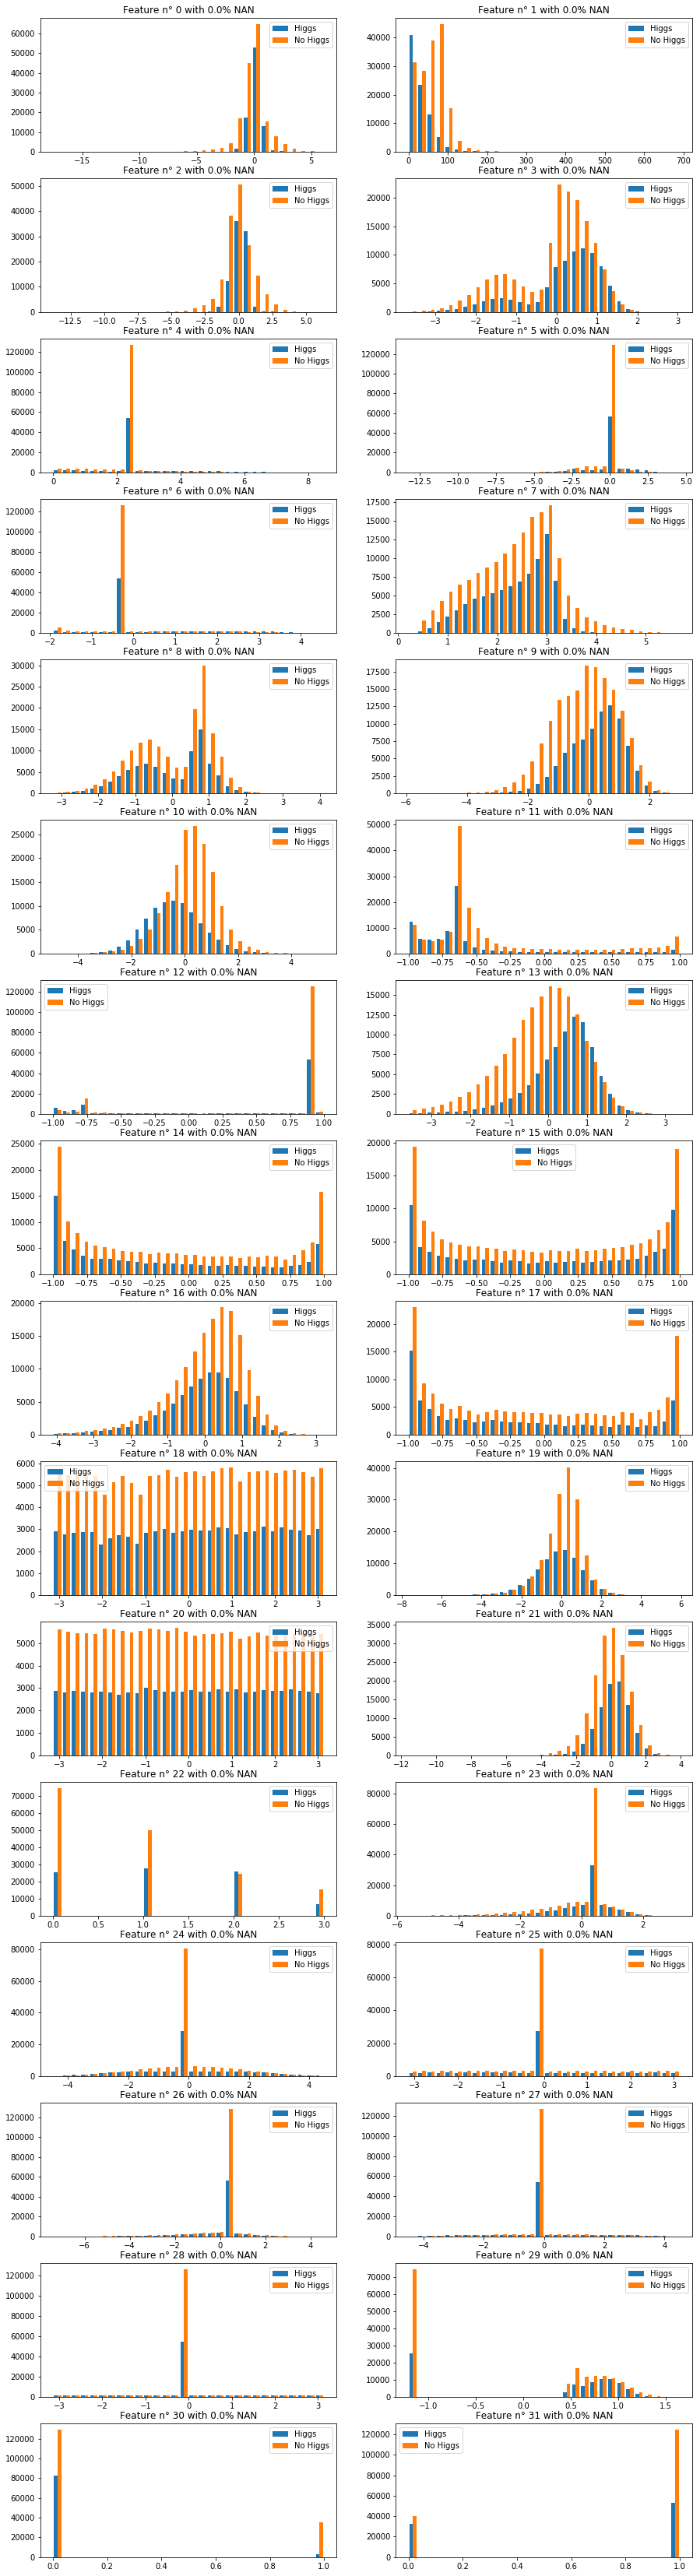

In [103]:
feature_std = features_log
tx_std, mean, std = standardize_features(tx_sin, feature_std)
display_feature_distribution(y, tx_std[:,:-1], 30)

### Feature 22

In [117]:
tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

### Remove useless features
Features [14, 15, 17, 18, 20, 25, 28] have shity distributions. We remove them

In [118]:
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]
tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
tx_removed.shape

(250000, 29)

# Train model 

### Train and Test models on small dataset

Gradient Descent, Loss : 0.777, Lambda : 0.00031622776601683794
Stochastic Gradient Descent, Loss : 0.808, Lambda : 0.0001291549665014884
Ridge Resgression, Loss : 0.704, Lambda : 1e-10


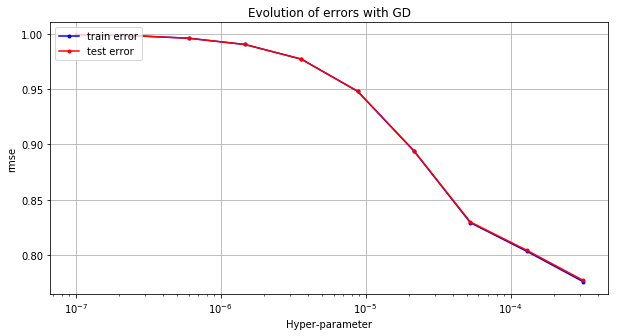

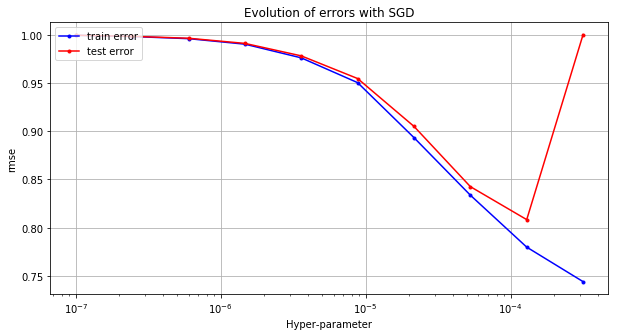

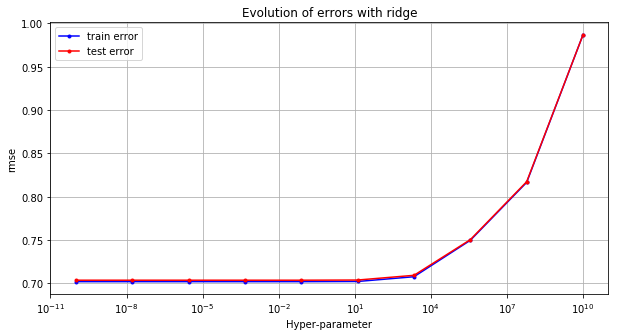

In [121]:
from train_model import *

initial_w = np.zeros(tx_removed.shape[1])
max_iter = 10  
batch_size = 100

gradient_descent_exploration(y, tx_removed, 0.75, np.logspace(-7, -3.5, 10), initial_w, max_iter)
stochastic_gradient_descent_exploration(y, tx_removed, 0.75, np.logspace(-7, -3.5, 10), initial_w, batch_size, max_iter)
ridge_regression_exploration(y, tx_removed, 0.75, np.logspace(-10, 10, 10))

In [123]:
ws_best = ridge_regression(y, tx_removed, 1e-2)

### Train and Test models on full dataset using cross validation

In [124]:
y_full, tx_full, ids = load_csv_data("data_csv/train.csv", sub_sample=False)
print("y has shape {0}".format(y_full.shape))
print("X has shape {0}".format(tx_full.shape))

y has shape (250000,)
X has shape (250000, 30)


In [125]:
features_square = [6]
tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
tx_log = transform_feature_log(tx_square, features_log)

# Load Kaggle Test Set

### Perform features transformation

In [128]:
y_test, tx_test, ids_test = load_csv_data("data_csv/test.csv", sub_sample=False)
print("y has shape {0}".format(y_test.shape))
print("X has shape {0}".format(tx_test.shape))

tx_nan = transform_to_nan(tx_test, -900)

nan_columns_patterns = [0, 4, 23]
tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

### Transform to log scale

features_square = [6]
tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
tx_log = transform_feature_log(tx_square, features_log)

### Decompose angles
features_sin = [11, 12, 14, 15, 17]
tx_angle_stand = standardize_angles(tx_log, features_sin)
tx_sin = transform_feature_sin(tx_angle_stand, features_sin)



### Standardize features
feature_std = features_log
tx_std, mean, std = standardize_features(tx_sin, feature_std)

### Feature 22
tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

### Remove useless features
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]
tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
tx_removed.shape


y has shape (568238,)
X has shape (568238, 30)


(568238, 29)

### Predict labels and Create CSV file

In [129]:
y_pred = predict_labels(ws_best, tx_removed)
create_csv_submission(ids_test, y_pred, 'Third_try')